In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
train_data_to_load=  "data/train.csv"
test_data_to_load =  "data/test.csv"


# Read the train and test Data
train_data = pd.read_csv("data/train.csv")
train_data
test_data = pd.read_csv("data/test.csv")
test_data.head()

test_data["Survived"]=""

# Combine the data into a single dataset
#combined_data = pd.merge(train_data, test_data, how="left", on=["Name","Name"])
Combined_data = train_data.append(test_data)

# Display the data table for preview
Combined_data.head()

C:\Users\sstat\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


problem statement
Complete the analysis of what sorts of people were likely to survive.
In particular, to predict which passengers survived the Titanic tragedy.

In [2]:
Combined_data.shape

(1309, 12)

In [3]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null object
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [4]:
Combined_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [5]:
Drop_data= Combined_data.drop(['Name','Ticket','Cabin'],axis =1)
Drop_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,1,3,male,1,0
1,38.0,C,71.2833,0,2,1,female,1,1
2,26.0,S,7.9250,0,3,3,female,0,1
3,35.0,S,53.1000,0,4,1,female,1,1
4,35.0,S,8.0500,0,5,3,male,0,0


In [6]:
Drop_data["Age"].fillna(Drop_data.groupby("Sex")["Age"].transform("mean"),inplace=True)

In [7]:
Drop_data.isna().sum()

Age            0
Embarked       2
Fare           1
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
dtype: int64

In [8]:
Drop_data= Drop_data[~Drop_data["Fare"].isna()]

In [9]:
Drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 417
Data columns (total 9 columns):
Age            1308 non-null float64
Embarked       1306 non-null object
Fare           1308 non-null float64
Parch          1308 non-null int64
PassengerId    1308 non-null int64
Pclass         1308 non-null int64
Sex            1308 non-null object
SibSp          1308 non-null int64
Survived       1308 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 102.2+ KB


In [10]:
mapping = {"female": 1, "male": 0}
Drop_data.Sex.replace(mapping, inplace=True)

In [11]:
train = Drop_data[Drop_data["Survived"]!= '']

In [12]:
test = Drop_data[Drop_data["Survived"]== '']

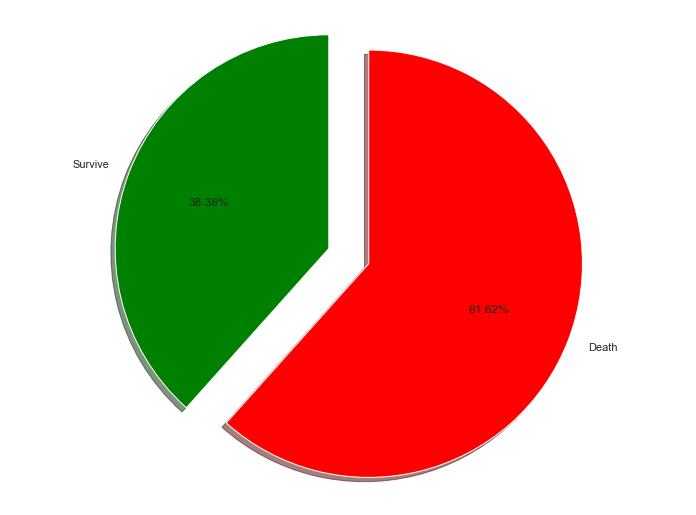

In [27]:
train.shape, test.shape# survived to death comparison of overall population

Survived_count = train.groupby('Survived')
count_Survived = Survived_count['Survived'].count()
count_Survived
# Pie Chart

pies = ["Survive", "Death"]
pie_counts = [342, 549]
colors = ["green", "red"]
explode = [0.1, 0.1]

plt.pie(pie_counts, explode=explode, labels=pies, colors=colors,
       autopct="%1.2f%%", shadow=True, startangle=90)

plt.axis("equal")

# Save Figure
plt.savefig("Titanic_survived to death comparison of overall population.Png")

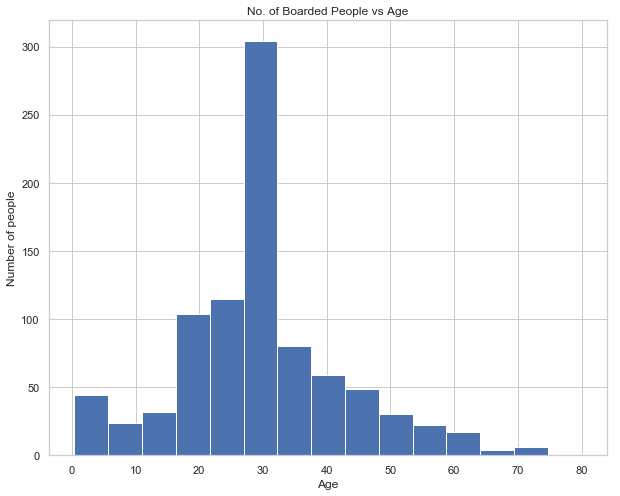

<Figure size 864x648 with 0 Axes>

In [28]:
#Age Analysis with respect to number of people boarded
train_hist= train.hist(column="Age", bins = 15, figsize = (10,8))
plt.title("No. of Boarded People vs Age")
plt.ylabel("Number of people")
plt.xlabel("Age")
plt.show()
# Save Figure
plt.savefig("Titanic_Number of People Vs Age.Png")

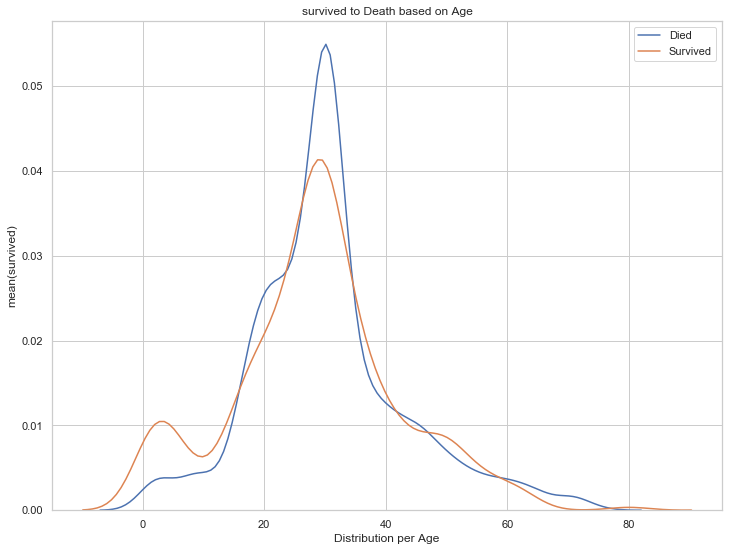

<Figure size 864x648 with 0 Axes>

In [29]:
# survival to death plot based on their age

a = sns.kdeplot(train.Age[train.Survived== 0], label ="Died")
b = sns.kdeplot(train.Age[train.Survived== 1], label ="Survived")
plt.title("survived to Death based on Age")
plt.xlabel("Distribution per Age")
plt.ylabel("mean(survived)")
plt.show()
# Save Figure
plt.savefig("Titanic_survived to Death based on Age.Png")

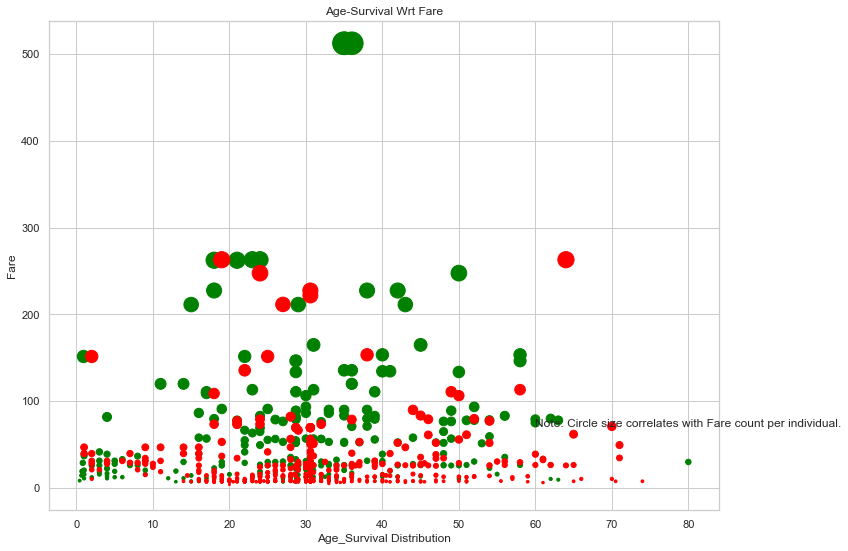

In [30]:
#Age_Survival per Fare
ax = plt.subplot()

ax.scatter(train[train['Survived'] == 1]['Age'], train[train['Survived'] == 1]['Fare'], 
           c='green', s=train[train['Survived'] == 1]['Fare'])
ax.scatter(train[train['Survived'] == 0]['Age'], train[train['Survived'] == 0]['Fare'], 
           c='red', s=train[train['Survived'] == 0]['Fare']);
plt.title("Age-Survival Wrt Fare")
plt.xlabel("Age_Survival Distribution")
plt.ylabel("Fare")

plt.text(60, 70,"Note: Circle size correlates with Fare count per individual.")
# Save Figure
plt.savefig("Titanic_Age_Survival per Fare.Png")

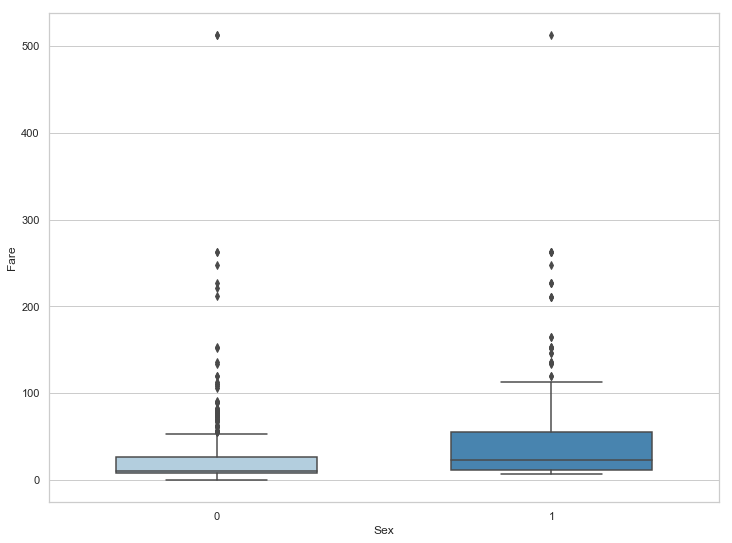

In [31]:
# Box plot fare between male vs female
from matplotlib import rcParams
sns.set(style="whitegrid")
rcParams['figure.figsize'] = 12,9
sns.boxplot( x=train["Sex"], y=train["Fare"],width=0.6, palette="Blues")

# Save Figure
plt.savefig("Titanic_fare between male vs female.Png")

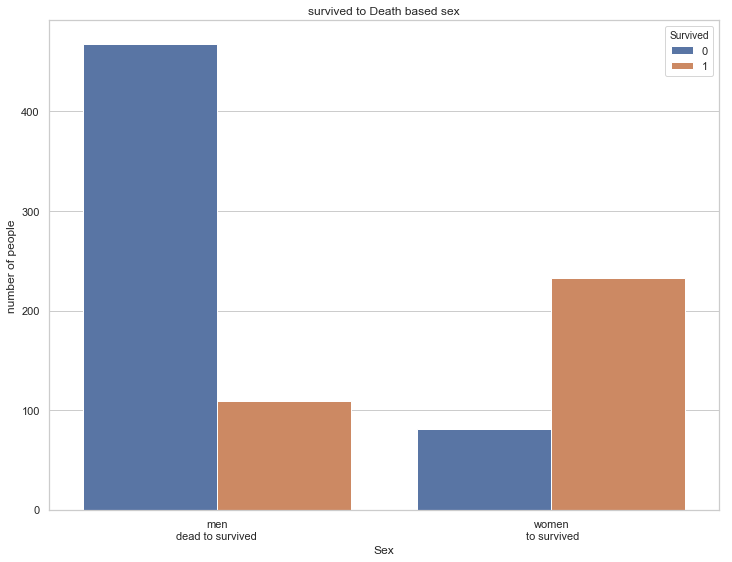

<Figure size 864x648 with 0 Axes>

In [32]:
# survived to death comparison for men and women

sns.countplot(x=train["Sex"], hue=train["Survived"])
N=2
plt.title("survived to Death based sex")
index = np.arange(N)
bar_width = 0.35
plt.ylabel("number of people")
tick_locations = [value for value in index]
plt.xticks(tick_locations, ["men\ndead to survived","women\n to survived"])
plt.show()
# Save Figure
plt.savefig("Titanic_survived to death comparison for men and women.Png")

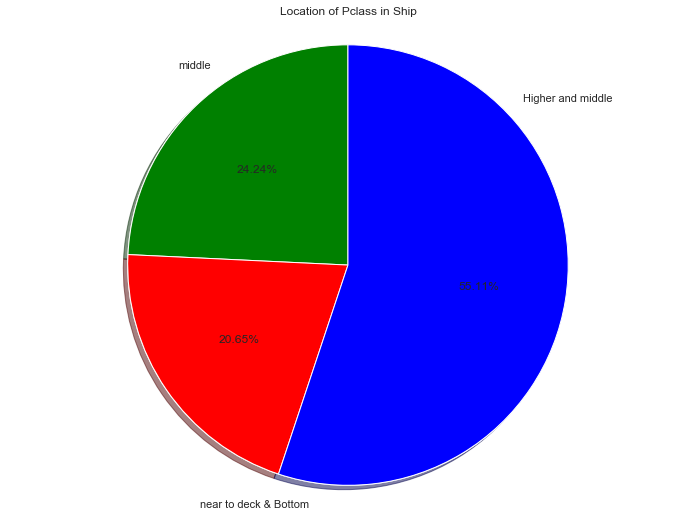

<Figure size 864x648 with 0 Axes>

In [33]:
#passenger class based on location of their seating arrplt.pie(part_class,labels=classes)

P1_class = (train['Pclass']==1).sum()
P2_class = (train['Pclass']==2).sum()
P3_class = (train['Pclass']==3).sum()
P1_class, P2_class, P3_class
classes = ['Higher and middle', 'middle', 'near to deck & Bottom']
part_class = [P1_class, P2_class, P3_class]
plt.pie(part_class,labels=classes)
plt.title("Location of Pclass in Ship")
colors = ["green", "red","blue"]
plt.pie(part_class,colors=colors,autopct="%1.2f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()
# Save Figure
plt.savefig("Titanic_Pclass Population Distribuction.Png")

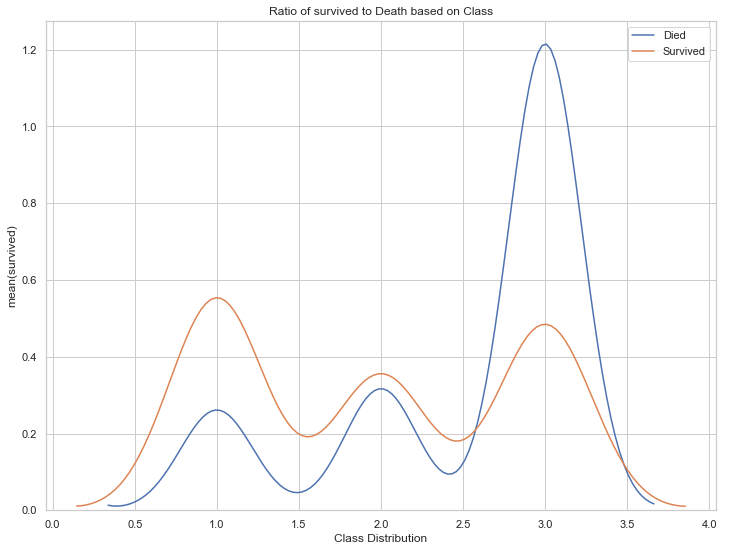

<Figure size 864x648 with 0 Axes>

In [34]:
# survival to death plot based on their seating location

a = sns.kdeplot(train.Pclass[train.Survived== 0], label ="Died")
b = sns.kdeplot(train.Pclass[train.Survived== 1], label ="Survived")
plt.title("Ratio of survived to Death based on Class")
plt.xlabel("Class Distribution")
plt.ylabel("mean(survived)")
plt.show()
# Save Figure
plt.savefig("Titanic_survived to death based on Pclass.Png")

In [22]:
train.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.762238,32.204208,0.381594,446.000000,2.308642,0.352413,0.523008
std,13.008413,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,35.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000


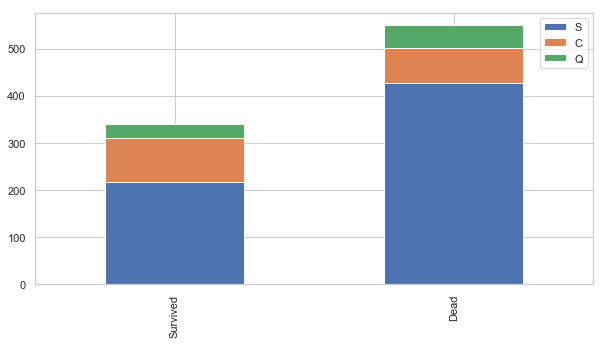

In [35]:
# Embarked station analysis
survived = train[train['Survived']==1].Embarked.value_counts()
dead = train[train['Survived']==0].Embarked.value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))
# Save Figure
plt.savefig("Titanic_Embarked station analysis.Png")

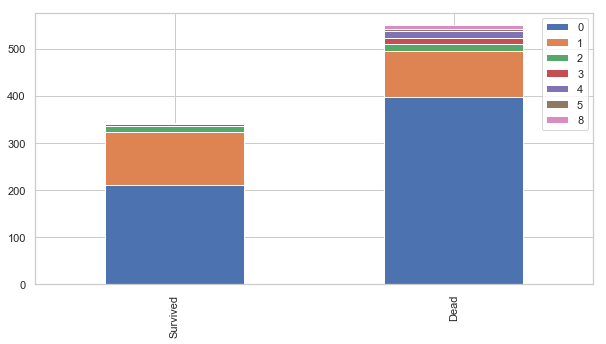

In [36]:
# Sibling Spouse dependent Survival analysis
survived = train[train['Survived']==1].SibSp.value_counts()
dead = train[train['Survived']==0].SibSp.value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))
# Save Figure
plt.savefig("Titanic_Sibling Spouse dependent Survival Analysis.Png")

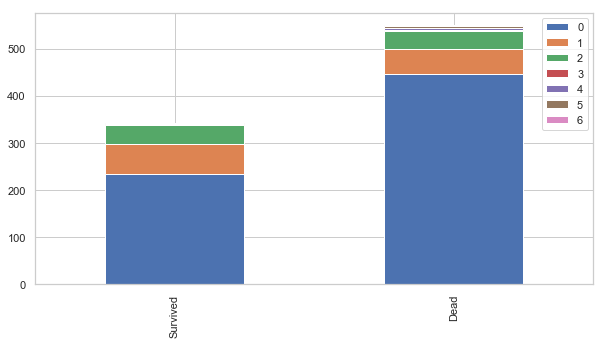

In [37]:
# Parent Children dependent Survival analysis
survived = train[train['Survived']==1].Parch.value_counts()
dead = train[train['Survived']==0].Parch.value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))
# Save Figure
plt.savefig("Titanic_Parent Children dependent Survival analysis.Png")

In [ ]:
# regression analysis